In [40]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

admissions = pd.read_csv('./ADMISSIONS.csv')
print(admissions.keys())

Index(['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime',
       'deathtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'religion',
       'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
       'hospital_expire_flag', 'has_chartevents_data'],
      dtype='object')


In [20]:
print('총 환자 수:', len(admissions))
print(len(admissions['row_id']))

총 환자 수: 129


In [30]:
admittime = pd.to_datetime(admissions['admittime'])
dischtime = pd.to_datetime(admissions['dischtime'])
time_diff_df = dischtime - admittime
time_diff_mean = time_diff_df.mean()
time_diff = time_diff_mean.to_string()
print(time_diff)
print(type(time_diff))


AttributeError: 'Timedelta' object has no attribute 'to_string'

In [60]:
admission_type = admissions['admission_type']
admission_type_set = set(admission_type)
print('입원 유형의 종류:', set(admission_type))
print('유형별 환자 수:')

admission_type_sum = admissions.groupby('admission_type')['row_id'].count()
admission_type_sum

입원 유형의 종류: {'EMERGENCY', 'URGENT', 'ELECTIVE'}
유형별 환자 수:


admission_type
ELECTIVE       8
EMERGENCY    119
URGENT         2
Name: row_id, dtype: int64

In [61]:
diagnosis = admissions['diagnosis']
diagnosis_set = set(diagnosis)
print('진단명의 종류:', set(diagnosis))
print('진단별 환자 수:')
diagnosis_sum = admissions.groupby('diagnosis')['row_id'].count()
diagnosis_sum

진단명의 종류: {'TACHYPNEA;TELEMETRY', 'PERICARDIAL EFFUSION', 'ASTHMA;CHRONIC OBST PULM DISEASE', 'METASTATIC MELANOMA;BRAIN METASTASIS', 'S/P FALL', 'VF ARREST ', 'HEPATIC ENCEP', 'PLEURAL EFFUSION', 'CHEST PAIN', 'URINARY TRACT INFECTION;PYELONEPHRITIS', 'VOLVULUS', 'ACUTE SUBDURAL HEMATOMA', 'SUBDURAL HEMATOMA/S/P FALL', 'AROMEGLEY;BURKITTS LYMPHOMA', 'INFERIOR MYOCARDIAL INFARCTION\\CATH', 'GASTROINTESTINAL BLEED', 'SEPSIS;PNEUMONIA;TELEMETRY', 'SEIZURE;STATUS EPILEPTICUS', 'STROKE/TIA', 'CEREBROVASCULAR ACCIDENT', 'FEVER;URINARY TRACT INFECTION', 'ESOPHAGEAL CANCER/SDA', 'NON SMALL CELL CANCER;HYPOXIA', 'SEPSIS', 'BRADYCARDIA', 'SYNCOPE;TELEMETRY;INTRACRANIAL HEMORRHAGE', 'CRITICAL AORTIC STENOSIS/HYPOTENSION', 'PULMONARY EDEMA, MI', 'ALTERED MENTAL STATUS', 'S/P MOTOR VEHICLE ACCIDENT', 'HYPONATREMIA;URINARY TRACT INFECTION', 'FACIAL NUMBNESS', 'ALCOHOLIC HEPATITIS', 'BASAL GANGLIN BLEED', 'LOWER GI BLEED', 'HYPOTENSION', 'LEFT HIP OA/SDA', 'SEPSIS;TELEMETRY', 'ABDOMINAL PAIN', 'CELLU

diagnosis
 MITRAL REGURGITATION;CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT WITH MVR  ? MITRAL VALVE REPLACEMENT /SDA    1
ABDOMINAL PAIN                                                                                                          1
ABSCESS                                                                                                                 1
ACUTE CHOLANGITIS                                                                                                       1
ACUTE CHOLECYSTITIS                                                                                                     1
                                                                                                                       ..
UROSEPSIS                                                                                                               1
UTI/PYELONEPHRITIS                                                                                                      1
VARICEAL BLEED

([<matplotlib.patches.Wedge at 0x210596f2590>,
 [Text(1.1, 0.0, 'nan'),
  Text(1.0947031993394167, 0.10781885436251668, 'OTHER'),
  Text(1.0732723430423816, 0.2410113641725568, 'ROMANIAN EAST. ORTH'),
  Text(1.0444809986523405, 0.3450499144387807, 'CHRISTIAN SCIENTIST'),
  Text(0.7184901272491546, 0.8329297311571331, 'UNOBTAINABLE'),
  Text(6.735557395310444e-17, 1.1, 'JEWISH'),
  Text(-0.3193131449799084, 1.0526343693054299, 'MUSLIM'),
  Text(-0.7966717912466135, 0.7584945992107738, 'NOT SPECIFIED'),
  Text(-1.0601536723749838, 0.2933840332223884, 'BUDDHIST'),
  Text(-1.1, 1.3471114790620887e-16, 'PROTESTANT QUAKER'),
  Text(0.13465174271913716, -1.0917274880585812, 'CATHOLIC')])

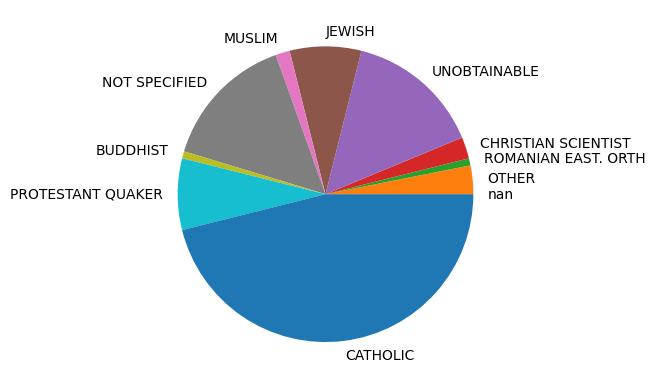

In [97]:
religion = admissions['religion']
marital_status = admissions['marital_status']
ethnicity = admissions['ethnicity']

set_religion = list(set(religion))
value_religion = []
for i in set_religion:
    value_religion.append(len(admissions.loc[religion == i]))


plt.pie(value_religion, labels=set_religion)


([<matplotlib.patches.Wedge at 0x210550ebdf0>,
 [Text(-0.4455469977406613, 1.0057275340788296, 'WIDOWED'),
  Text(-0.9092726116700225, 0.6190503353256315, 'UNKNOWN (DEFAULT)'),
  Text(-1.0618559622350805, -0.287161828009594, 'SINGLE'),
  Text(-0.44554699774066137, -1.0057275340788296, 'DIVORCED'),
  Text(1.0871653274120632, -0.16754566802224863, 'MARRIED'),
  Text(0.0611323411915966, 1.0982999758082646, 'nan'),
  Text(0.030578038744330287, 1.0995749103842587, 'SEPARATED')])

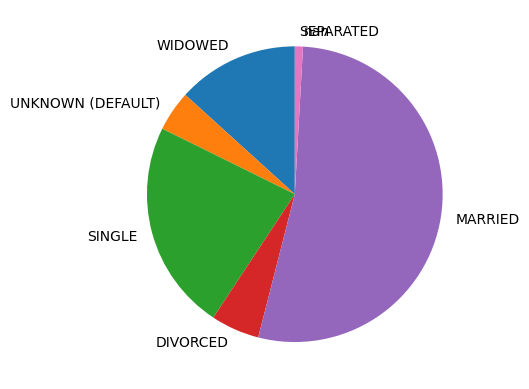

In [49]:
set_marital_status = list(set(marital_status))
value_marital_status = []
for i in set_marital_status:
    value_marital_status.append(len(admissions.loc[marital_status == i]))
plt.pie(value_marital_status, labels=set_marital_status, startangle=90)



([<matplotlib.patches.Wedge at 0x21057147a60>,
 [Text(-0.080294845828409, 1.0970655120517607, 'OTHER'),
  Text(-0.2129569782455196, 1.0791891981559756, 'HISPANIC OR LATINO'),
  Text(-0.629104117161166, 0.9023458371217047, 'HISPANIC/LATINO - PUERTO RICAN'),
  Text(-0.924720008047471, 0.5957288869248204, 'UNABLE TO OBTAIN'),
  Text(-0.026786036431190863, -1.0996738190264908, 'WHITE'),
  Text(0.8623953983556588, 0.6828427175382226, 'BLACK/AFRICAN AMERICAN'),
  Text(0.6932927339785849, 0.8540170870729105, 'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE'),
  Text(0.3929538210681684, 1.0274177799259296, 'UNKNOWN/NOT SPECIFIED'),
  Text(0.05355618723430871, 1.0986954695496491, 'ASIAN')])

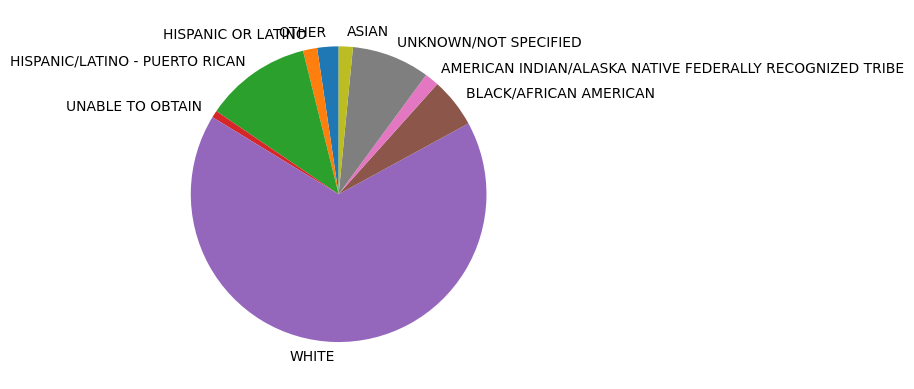

In [50]:
set_ethnicity = list(set(ethnicity))
value_ethnicity = []
for i in set_ethnicity:
    value_ethnicity.append(len(admissions.loc[ethnicity == i]))
plt.pie(value_ethnicity, labels=set_ethnicity, startangle=90)

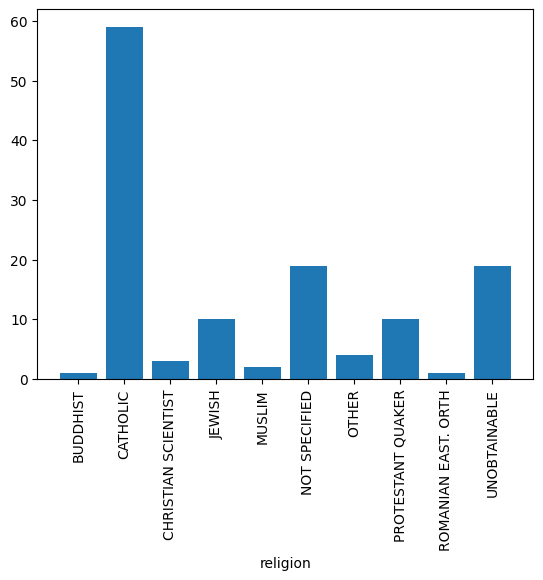

In [91]:
religion = admissions.groupby('religion')['row_id'].count()

label = list(religion.keys())
index = np.arange(len(label))

plt.bar(index, religion)
plt.xlabel('religion')
plt.xticks(index, label, rotation=90)
plt.show()


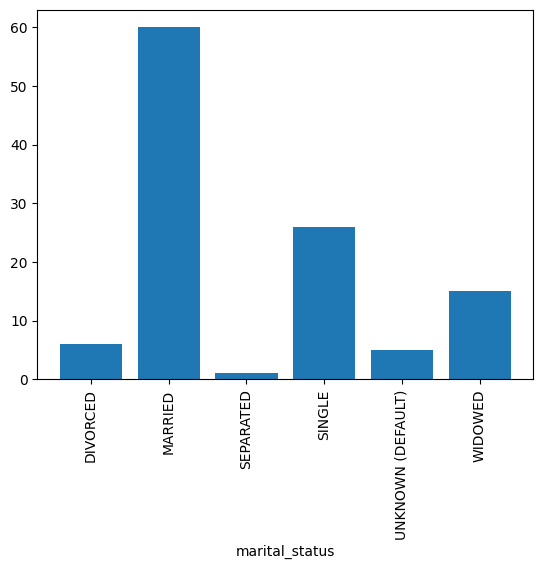

In [92]:
marital_status = admissions.groupby('marital_status')['row_id'].count()

label = list(marital_status.keys())
index = np.arange(len(label))

plt.bar(index, marital_status)
plt.xlabel('marital_status')
plt.xticks(index, label, rotation=90)
plt.show()

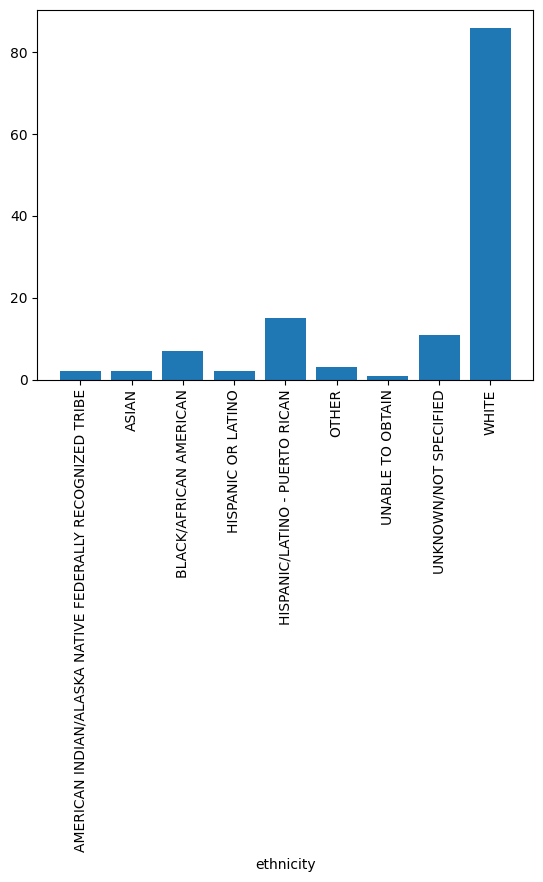

In [93]:
ethnicity = admissions.groupby('ethnicity')['row_id'].count()

label = list(ethnicity.keys())
index = np.arange(len(label))

plt.bar(index, ethnicity)
plt.xlabel('ethnicity')
plt.xticks(index, label, rotation=90)
plt.show()